In [1]:
import xinfer
model = xinfer.create_model("ultralytics/yolov8s-seg", device="cuda", dtype="bfloat16")

2024-11-10 00:34:02.853 | INFO     | xinfer.models:__init__:63 - Model: ultralytics/yolov8s-seg
2024-11-10 00:34:02.853 | INFO     | xinfer.models:__init__:64 - Device: cuda
2024-11-10 00:34:02.854 | INFO     | xinfer.models:__init__:65 - Dtype: bfloat16


100%|██████████| 22.8M/22.8M [00:02<00:00, 10.1MB/s]


In [2]:
result = model.infer("/home/dnth/Downloads/two.jpg")
result


0: 448x640 2 persons, 67.8ms
Speed: 1.9ms preprocess, 67.8ms inference, 65.6ms postprocess per image at shape (1, 3, 448, 640)


Result(categories=None, boxes=[Box(x1=257.34375, y1=25.734375, x2=404.15625, y2=336.65625, score=0.9384765625, label='person'), Box(x1=140.0625, y1=24.2578125, x2=261.5625, y2=322.734375, score=0.93359375, label='person')], masks=[Mask(xy=[[313.03125, 26.437498092651367], [313.03125, 29.812498092651367], [305.4375, 37.40625], [305.4375, 38.25], [303.75, 39.9375], [303.75, 42.46875], [302.90625, 43.3125], [302.90625, 44.15625], [303.75, 45.0], [303.75, 47.53125], [304.59375, 48.375], [304.59375, 50.0625], [305.4375, 50.90625], [305.4375, 53.4375], [306.28125, 54.28125], [306.28125, 57.65625], [307.125, 58.5], [307.125, 61.03125], [308.8125, 62.71875], [308.8125, 63.5625], [309.65625, 64.40625], [309.65625, 65.25], [310.5, 66.09375], [310.5, 66.9375], [312.1875, 68.625], [312.1875, 69.46875], [313.03125, 70.3125], [313.03125, 71.15625], [314.71875, 72.84375], [314.71875, 73.6875], [315.5625, 74.53125], [315.5625, 77.90625], [314.71875, 78.75], [314.71875, 79.59375], [309.65625, 84.65625]

In [3]:
result.masks

[Mask(xy=[[313.03125, 26.437498092651367], [313.03125, 29.812498092651367], [305.4375, 37.40625], [305.4375, 38.25], [303.75, 39.9375], [303.75, 42.46875], [302.90625, 43.3125], [302.90625, 44.15625], [303.75, 45.0], [303.75, 47.53125], [304.59375, 48.375], [304.59375, 50.0625], [305.4375, 50.90625], [305.4375, 53.4375], [306.28125, 54.28125], [306.28125, 57.65625], [307.125, 58.5], [307.125, 61.03125], [308.8125, 62.71875], [308.8125, 63.5625], [309.65625, 64.40625], [309.65625, 65.25], [310.5, 66.09375], [310.5, 66.9375], [312.1875, 68.625], [312.1875, 69.46875], [313.03125, 70.3125], [313.03125, 71.15625], [314.71875, 72.84375], [314.71875, 73.6875], [315.5625, 74.53125], [315.5625, 77.90625], [314.71875, 78.75], [314.71875, 79.59375], [309.65625, 84.65625], [308.8125, 84.65625], [307.125, 86.34375], [307.125, 87.1875], [304.59375, 89.71875], [304.59375, 90.5625], [303.75, 91.40625], [303.75, 92.25], [302.90625, 93.09375], [302.90625, 93.9375], [302.0625, 94.78125], [302.0625, 95.62

In [4]:
def plot_mask_over_image(image_path, mask_xy, figsize=(10,10)):
    """
    Plot a mask overlay on an image
    
    Args:
        image_path (str): Path to the image file
        mask_xy (list): List of [x,y] coordinates defining the mask polygon
        figsize (tuple): Figure size for the plot
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from PIL import Image
    
    # Read the image
    img = Image.open(image_path)
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # Display the image
    ax.imshow(img)
    
    # Convert mask coordinates to numpy arrays for easier plotting
    mask_xy = np.array(mask_xy)
    x = mask_xy[:, 0]
    y = mask_xy[:, 1]
    
    # Plot the mask as a semi-transparent polygon
    ax.fill(x, y, alpha=0.3, color='red')
    
    # Optional: plot the mask boundary
    ax.plot(x, y, 'r-', linewidth=1, alpha=0.5)
    
    plt.axis('off')
    plt.show()


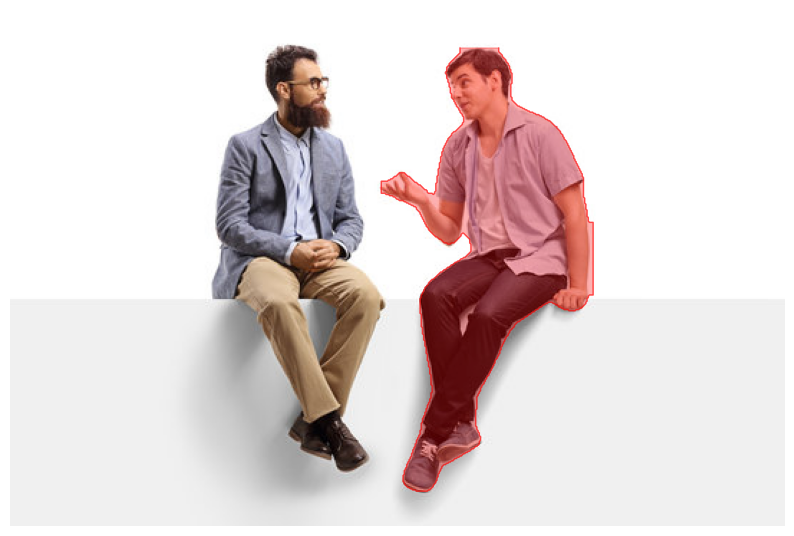

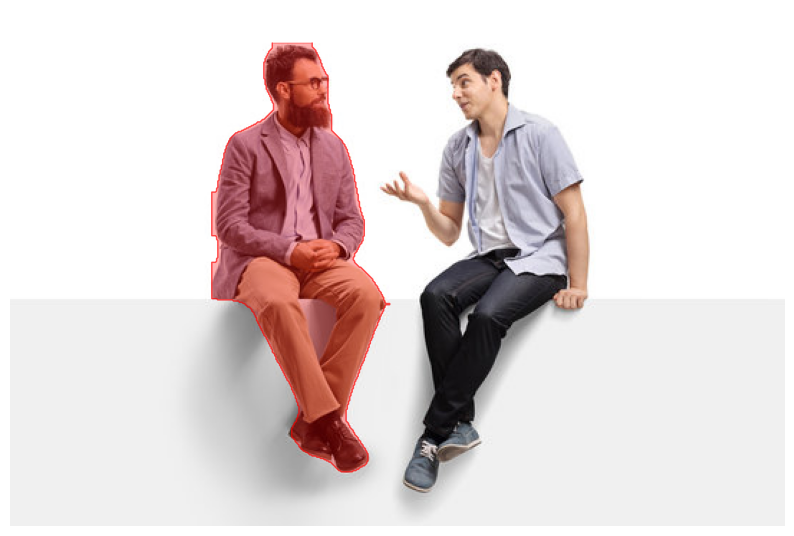

In [5]:
for mask in result.masks:
    plot_mask_over_image("/home/dnth/Downloads/two.jpg", mask.xy)


In [6]:
model.launch_gradio()

* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


2024-11-10 00:34:20.529 | INFO     | xinfer.models:__init__:63 - Model: ultralytics/yolov8s-seg
2024-11-10 00:34:20.531 | INFO     | xinfer.models:__init__:64 - Device: cuda
2024-11-10 00:34:20.531 | INFO     | xinfer.models:__init__:65 - Dtype: bfloat16



0: 448x640 1 person, 61.7ms
Speed: 1.2ms preprocess, 61.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


2024-11-10 00:34:36.474 | INFO     | xinfer.models:__init__:63 - Model: ultralytics/yolov8s-seg
2024-11-10 00:34:36.477 | INFO     | xinfer.models:__init__:64 - Device: cuda
2024-11-10 00:34:36.478 | INFO     | xinfer.models:__init__:65 - Dtype: bfloat16



0: 480x640 14 persons, 1 car, 1 surfboard, 71.6ms
Speed: 1.6ms preprocess, 71.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
